# Neural Network for Time Series Forecasting

This notebook implements a neural network model for time series prediction

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

## Dataset and preprocessing

In [237]:
df = pd.read_csv("datasets\CrudeOil.csv")

In [238]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
5,2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0


In [239]:
df["Date"] = pd.to_datetime(df["Date"])

In [240]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
...,...,...,...,...,...,...,...
3033,2019-12-26,61.200001,61.830002,61.060001,61.680000,61.680000,204535.0
3034,2019-12-27,61.730000,61.970001,61.240002,61.720001,61.720001,265091.0
3035,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
3036,2019-12-30,61.709999,62.340000,61.090000,61.680000,61.680000,351899.0


In [241]:
df = df.set_index(df['Date']).sort_index()

In [242]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
2010-01-05,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2010-01-06,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
2010-01-07,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
2010-01-08,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
...,...,...,...,...,...,...,...
2019-12-26,2019-12-26,61.200001,61.830002,61.060001,61.680000,61.680000,204535.0
2019-12-27,2019-12-27,61.730000,61.970001,61.240002,61.720001,61.720001,265091.0
2019-12-29,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
df.isnull().sum()

Date           0
Open         543
High         543
Low          543
Close        543
Adj Close    543
Volume       543
dtype: int64

In [244]:
df.drop(columns=['Date'], inplace=True)

In [245]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
...,...,...,...,...,...,...
2019-12-26,61.200001,61.830002,61.060001,61.680000,61.680000,204535.0
2019-12-27,61.730000,61.970001,61.240002,61.720001,61.720001,265091.0
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

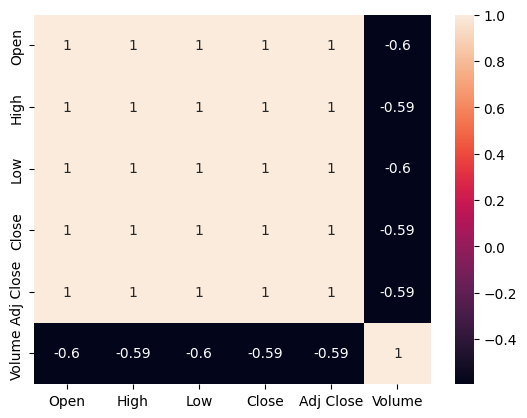

In [246]:
sns.heatmap(df.corr(),annot=True)

In [247]:
df = df.drop(columns=['Open','High','Low','Adj Close'])

In [248]:
df

,Close,Volume
Date,,
2010-01-04,81.510002,120372.0
2010-01-05,81.769997,263542.0
2010-01-06,83.180000,258887.0
2010-01-07,82.660004,370059.0
2010-01-08,82.750000,246632.0
...,...,...
2019-12-26,61.680000,204535.0
2019-12-27,61.720001,265091.0
2019-12-29,NaN,NaN


In [249]:
lol = df.dropna(subset = ["Close"])

In [250]:
# lol.isnull().sum()

In [251]:
df = df.dropna(subset = ["Close"])

<Axes: xlabel='Date', ylabel='Close'>

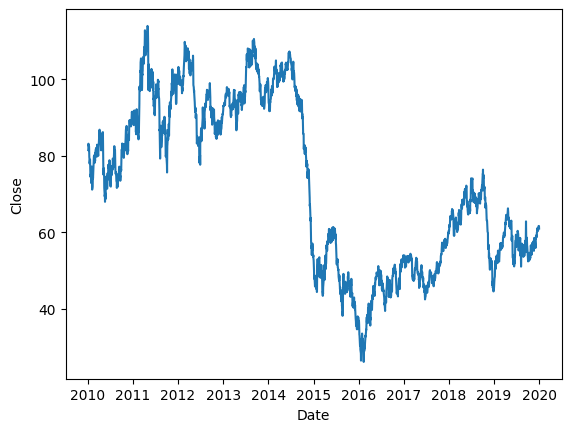

In [252]:
sns.lineplot(df["Close"])


<Axes: xlabel='Date', ylabel='Volume'>

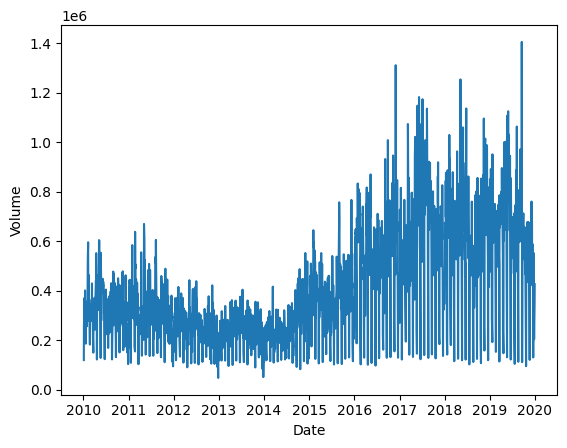

In [253]:
sns.lineplot(df['Volume'])

## Sequence construction

We do not need all of the data points from the past, only relevant ones

In [254]:
df = df["2019-01-01":].copy(deep=True)
df

,Close,Volume
Date,,
2019-01-02,46.540001,476970.0
2019-01-03,47.090000,850480.0
2019-01-04,47.959999,788718.0
2019-01-07,48.520000,817277.0
2019-01-08,49.779999,819939.0
...,...,...
2019-12-23,60.520000,552517.0
2019-12-26,61.680000,204535.0
2019-12-27,61.720001,265091.0


<Axes: xlabel='Date', ylabel='Close'>

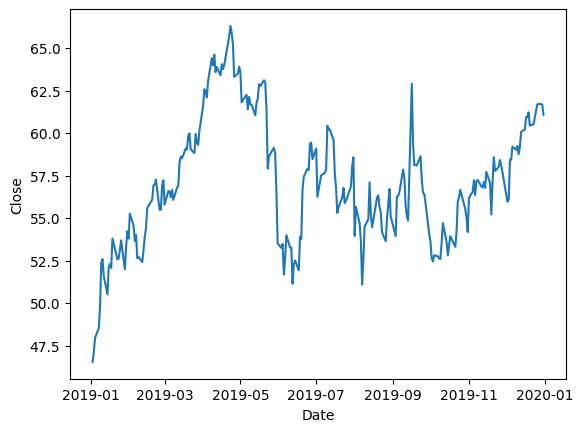

In [255]:
sns.lineplot(df["Close"])

### Lagging with Volume

In [256]:
features = ["Volume", "Close"]
lags = range(10,0,-1)

In [257]:
for lag in lags:
    for column in features:
        df[f"{column}_{lag}"] = df[column].shift(lag)

df

,Close,Volume,Volume_10,Close_10,Volume_9,Close_9,Volume_8,Close_8,Volume_7,Close_7,...,Volume_5,Close_5,Volume_4,Close_4,Volume_3,Close_3,Volume_2,Close_2,Volume_1,Close_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,46.540001,476970.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,47.090000,850480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476970.0,46.540001
2019-01-04,47.959999,788718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,476970.0,46.540001,850480.0,47.090000
2019-01-07,48.520000,817277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,476970.0,46.540001,850480.0,47.090000,788718.0,47.959999
2019-01-08,49.779999,819939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,476970.0,46.540001,850480.0,47.090000,788718.0,47.959999,817277.0,48.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,60.520000,552517.0,679609.0,59.020000,511561.0,59.240002,566822.0,58.759998,589650.0,59.180000,...,512288.0,60.209999,347395.0,60.939999,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999
2019-12-26,61.680000,204535.0,511561.0,59.240002,566822.0,58.759998,589650.0,59.180000,530851.0,60.070000,...,347395.0,60.939999,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999,552517.0,60.520000
2019-12-27,61.720001,265091.0,566822.0,58.759998,589650.0,59.180000,530851.0,60.070000,512288.0,60.209999,...,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999,552517.0,60.520000,204535.0,61.680000


In [258]:
df.dropna(axis=0,inplace=True)

In [259]:
df.drop(columns=["Volume"],axis =1, inplace=True)
df

,Close,Volume_10,Close_10,Volume_9,Close_9,Volume_8,Close_8,Volume_7,Close_7,Volume_6,...,Volume_5,Close_5,Volume_4,Close_4,Volume_3,Close_3,Volume_2,Close_2,Volume_1,Close_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-16,52.310001,476970.0,46.540001,850480.0,47.090000,788718.0,47.959999,817277.0,48.520000,819939.0,...,765981.0,52.360001,891922.0,52.590000,821782.0,51.590000,812339.0,50.509998,791527.0,52.110001
2019-01-17,52.070000,850480.0,47.090000,788718.0,47.959999,817277.0,48.520000,819939.0,49.779999,765981.0,...,891922.0,52.590000,821782.0,51.590000,812339.0,50.509998,791527.0,52.110001,664183.0,52.310001
2019-01-18,53.799999,788718.0,47.959999,817277.0,48.520000,819939.0,49.779999,765981.0,52.360001,891922.0,...,821782.0,51.590000,812339.0,50.509998,791527.0,52.110001,664183.0,52.310001,694182.0,52.070000
2019-01-22,52.570000,817277.0,48.520000,819939.0,49.779999,765981.0,52.360001,891922.0,52.590000,821782.0,...,812339.0,50.509998,791527.0,52.110001,664183.0,52.310001,694182.0,52.070000,288560.0,53.799999
2019-01-23,52.619999,819939.0,49.779999,765981.0,52.360001,891922.0,52.590000,821782.0,51.590000,812339.0,...,791527.0,52.110001,664183.0,52.310001,694182.0,52.070000,288560.0,53.799999,193099.0,52.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,60.520000,679609.0,59.020000,511561.0,59.240002,566822.0,58.759998,589650.0,59.180000,530851.0,...,512288.0,60.209999,347395.0,60.939999,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999
2019-12-26,61.680000,511561.0,59.240002,566822.0,58.759998,589650.0,59.180000,530851.0,60.070000,512288.0,...,347395.0,60.939999,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999,552517.0,60.520000
2019-12-27,61.720001,566822.0,58.759998,589650.0,59.180000,530851.0,60.070000,512288.0,60.209999,347395.0,...,163744.0,60.930000,131071.0,61.220001,426341.0,60.439999,552517.0,60.520000,204535.0,61.680000


In [260]:
X,y = df.drop(columns=["Close"]),df["Close"]

### Train/Test split, Model Building (LSTM) and evaluation with Volume

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=False)

In [262]:
df["Close"].describe()

count    239.000000
mean      57.330000
std        3.438601
min       51.090000
25%       54.625000
50%       56.799999
75%       59.360000
max       66.300003
Name: Close, dtype: float64

In [263]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))

In [265]:
lag = 10
X_train_reshape = X_train.reshape((X_train.shape[0],lag,2))
X_test_reshape = X_test.reshape((X_test.shape[0],lag,2))

In [266]:
model = Sequential([
    Input((lag,2)),
    LSTM(64,return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1)
])

In [267]:
model.compile(
    loss = "mean_squared_error",
    optimizer="adam"
)

In [268]:
history = model.fit(
    X_train_reshape,
    y_train,
    validation_split=0.2,
    epochs=22,
    batch_size=63,
    shuffle=False
)

Epoch 1/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 0.2250 - val_loss: 0.0589
Epoch 2/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1392 - val_loss: 0.0203
Epoch 3/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0706 - val_loss: 0.0218
Epoch 4/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0432 - val_loss: 0.0507
Epoch 5/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0475 - val_loss: 0.0368
Epoch 6/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - val_loss: 0.0192
Epoch 7/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - val_loss: 0.0150
Epoch 8/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0441 - val_loss: 0.0153
Epoch 9/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0457 - val_loss: 0.0154
Epoch 10/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0410 - val_loss: 0.0160
Epoch 11/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0340 - val_loss: 0.0185
Epoch 12/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0290 - val_loss: 0.0204


In [269]:
pred_y = model.predict(X_test_reshape)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


In [270]:
pred = y_scaler.inverse_transform(pred_y)

In [271]:
print("R2:", r2_score(y_test,pred))

R2: 0.594689258777138


<Axes: >

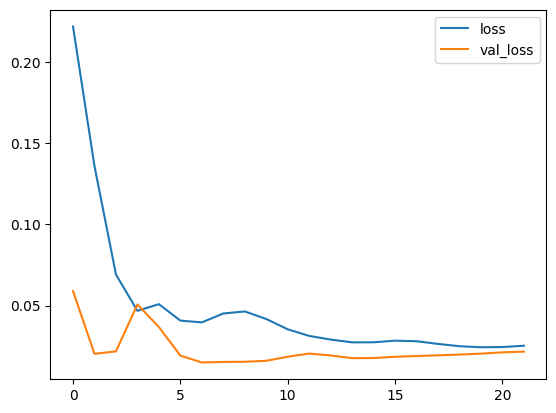

In [272]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

### Checking results without the Volume column

In [274]:
data = df[["Close"]]

In [275]:
data

,Close
Date,
2019-01-16,52.310001
2019-01-17,52.070000
2019-01-18,53.799999
2019-01-22,52.570000
2019-01-23,52.619999
...,...
2019-12-23,60.520000
2019-12-26,61.680000
2019-12-27,61.720001


In [276]:
data_c = data.shift(periods=lags)
data_c.columns = [f"Close_{i}" for i in lags]

In [277]:
data_c

,Close_10,Close_9,Close_8,Close_7,Close_6,Close_5,Close_4,Close_3,Close_2,Close_1
Date,,,,,,,,,,
2019-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.310001
2019-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.310001,52.070000
2019-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.310001,52.070000,53.799999
2019-01-23,NaN,NaN,NaN,NaN,NaN,NaN,52.310001,52.070000,53.799999,52.570000
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,59.020000,59.240002,58.759998,59.180000,60.070000,60.209999,60.939999,60.930000,61.220001,60.439999
2019-12-26,59.240002,58.759998,59.180000,60.070000,60.209999,60.939999,60.930000,61.220001,60.439999,60.520000
2019-12-27,58.759998,59.180000,60.070000,60.209999,60.939999,60.930000,61.220001,60.439999,60.520000,61.680000


In [278]:
unified = pd.merge(
    left = data,
    right = data_c,
    left_index=True,
    right_index=True
)


In [279]:
unified.dropna(inplace=True)

In [280]:
X,y = unified.drop(columns=["Close"]), unified["Close"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, shuffle=False
)

In [281]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [282]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))

In [283]:
X_train_reshape = X_train.reshape((X_train.shape[0],lag,1))
X_test_reshape = X_test.reshape((X_test.shape[0],lag,1))

In [284]:
model_uni = Sequential([
    Input((lag, 1)),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1)
])

In [285]:
model_uni.compile(
    loss="mean_squared_error",
    optimizer="adam"
)

In [286]:
history = model_uni.fit(
    X_train_reshape,
    y_train,
    validation_split=0.2,
    epochs=22,
    batch_size=63,
    shuffle=False
)

Epoch 1/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 911ms/step - loss: 0.2967 - val_loss: 0.0731
Epoch 2/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2179 - val_loss: 0.0462
Epoch 3/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1482 - val_loss: 0.0262
Epoch 4/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0829 - val_loss: 0.0235
Epoch 5/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0380 - val_loss: 0.0481
Epoch 6/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0334 - val_loss: 0.0559
Epoch 7/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0298 - val_loss: 0.0379
Epoch 8/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0235 - val_loss: 0.0259
Epoch 9/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0293 - val_loss: 0.0221
Epoch 10/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0370 - val_loss: 0.0214
Epoch 11/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0390 - val_loss: 0.0219
Epoch 12/22
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0355 - val_loss: 0.0237


In [287]:
pred_y = model_uni.predict(X_test_reshape)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step


In [288]:
pred = y_scaler.inverse_transform(pred_y)

In [289]:
print("R2 score:", r2_score(y_test,pred))

R2 score: 0.5199596664131304


<Axes: >

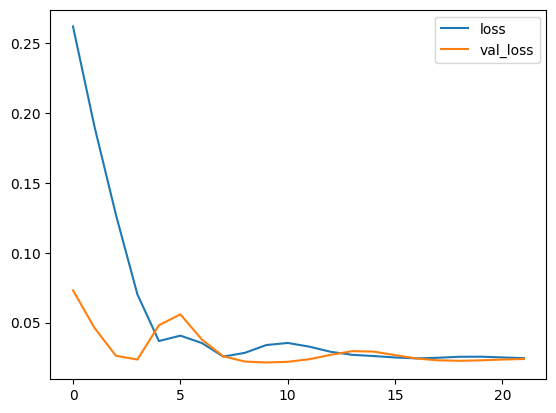

In [291]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [293]:
#Без fine-tunning на аргументите, може да се забележи 
#подобар резултат во моделот којшто го вклучува и Volume
#Оптимален број епохи за да нема overfit: 22 
#Иницијален број епохи: 50